In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9)  /  channel_first

val_loss: 0.31826767325401306
loss: 0.3245305120944977


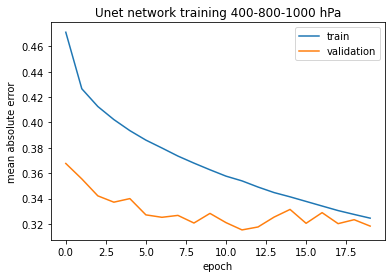

In [27]:
history = pickle.load( open( "/opt/datos/entrenamientos/gfs/01", "rb" ) )

print(f"val_loss: {history['val_loss'][-1]}")
print(f"loss: {history['loss'][-1]}")
#print(history)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Unet network training 400-800-1000 hPa')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
#plt.ylim(0,0.4)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [3]:
model = load_model('/opt/datos/entrenamientos/gfs/01.h5')
x_test = np.load("/opt/datos/dataset/gfs/X_test_3-7-9.npy")
y_test = np.load("/opt/datos/dataset/gfs/Y_test.npy")

x_test = x_test[:, :, 0:128, 0:144]
y_test = y_test[:, 0:128, 0:144]

print(x_test.shape)
print(y_test.shape)

(2893, 3, 137, 157)
(2893, 137, 157)


In [6]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 1, 128, 144)


Text(0.5, 1.0, 'Prediccion')

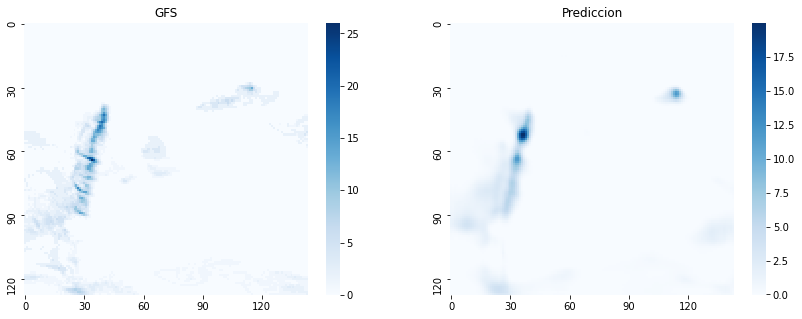

In [26]:
muestra = 2862
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, 0, :, :],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')